# Estimated and observed closest strains per timepoint

Create a figure similar to Figure 2D in Neher et al. 2014 showing the minimum estimated distance to the future and minimum observed distance to the future per timepoint.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
sns.set_style("white")
plt.style.use("huddlej")

In [4]:
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.weight'] = 300
mpl.rcParams['axes.labelweight'] = 300
mpl.rcParams['font.size'] = 18

In [59]:
df = pd.read_csv(
    "../results/builds/natural/natural_sample_0_with_30_vpm_sliding/natural_sample_0_with_30_vpm_sliding_delta_frequency-ne_star_forecast.tsv",
    sep="\t"
)

In [60]:
df.head()

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-ne_star,future_timepoint
0,1995-10-01,A/England/121/1995,0.002912,11.591351,20.301243,-2.290440,1.442146e-06,13.199158,13.199158,1996-10-01
1,1995-10-01,A/England/178/1995,0.009046,8.806357,18.974534,-0.083940,4.069541e-05,11.197801,11.197801,1996-10-01
2,1995-10-01,A/England/255/1995,0.005132,8.136440,11.704883,7.479861,4.449308e-02,1.991264,1.991264,1996-10-01
3,1995-10-01,A/England/258/1995,0.039570,11.784358,19.956980,-5.583766,7.276301e-07,13.733515,13.733515,1996-10-01
4,1995-10-01,A/England/263/1995,0.047167,9.562186,19.974537,0.307624,3.138927e-04,12.196942,12.196942,1996-10-01


In [61]:
mean_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].mean().reset_index()
mean_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,17.001804
1,1996-04-01,11.614254
2,1996-10-01,13.582028
3,1997-04-01,11.810146
4,1997-10-01,13.604810


In [62]:
# Find the minimum weighted distance to the future.
minimum_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].min().reset_index()
minimum_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,6.311513
1,1996-04-01,6.750710
2,1996-10-01,8.973677
3,1997-04-01,6.382600
4,1997-10-01,5.828201


In [63]:
estimated_distance_to_future_df = df.sort_values(
    ["timepoint", "fitness"],
    ascending=False
).groupby("timepoint")["weighted_distance_to_future"].first().reset_index()
estimated_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,11.704883
1,1996-04-01,6.750710
2,1996-10-01,12.949729
3,1997-04-01,14.222939
4,1997-10-01,14.974391


In [65]:
df.dropna().shape

(10178, 10)

In [66]:
sorted_df = df.dropna().sort_values(
    ["timepoint"]
).copy()

In [67]:
sorted_df.head()

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-ne_star,future_timepoint
0,1995-10-01,A/England/121/1995,0.002912,11.591351,20.301243,-2.290440,0.000001,13.199158,13.199158,1996-10-01
34,1995-10-01,A/NewYork/676/1995,0.000780,9.856223,13.731768,-0.693091,0.000002,4.220224,4.220224,1996-10-01
35,1995-10-01,A/NewYork/677/1995,0.008027,9.711338,19.974537,-1.901217,0.000006,12.197774,12.197774,1996-10-01
36,1995-10-01,A/NewYork/678/1995,0.000932,7.973626,11.763782,2.954340,0.000088,2.373707,2.373707,1996-10-01
37,1995-10-01,A/NewYork/679/1995,0.016380,9.773594,19.932890,-1.901217,0.000012,12.197777,12.197777,1996-10-01


In [68]:
sorted_df["timepoint_rank"] = sorted_df.groupby("timepoint")["weighted_distance_to_future"].rank(pct=True)

In [69]:
sorted_df.head(5)

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-ne_star,future_timepoint,timepoint_rank
0,1995-10-01,A/England/121/1995,0.002912,11.591351,20.301243,-2.290440,0.000001,13.199158,13.199158,1996-10-01,0.812500
34,1995-10-01,A/NewYork/676/1995,0.000780,9.856223,13.731768,-0.693091,0.000002,4.220224,4.220224,1996-10-01,0.304688
35,1995-10-01,A/NewYork/677/1995,0.008027,9.711338,19.974537,-1.901217,0.000006,12.197774,12.197774,1996-10-01,0.781250
36,1995-10-01,A/NewYork/678/1995,0.000932,7.973626,11.763782,2.954340,0.000088,2.373707,2.373707,1996-10-01,0.132812
37,1995-10-01,A/NewYork/679/1995,0.016380,9.773594,19.932890,-1.901217,0.000012,12.197777,12.197777,1996-10-01,0.703125


In [70]:
best_fitness_rank_by_timepoint_df = sorted_df.sort_values(
    ["timepoint", "fitness"],
    ascending=False
).groupby("timepoint")["timepoint_rank"].first().reset_index()

In [71]:
best_fitness_rank_by_timepoint_df.head()

,timepoint,timepoint_rank
0,1995-10-01,0.234375
1,1996-04-01,0.043478
2,1996-10-01,0.483871
3,1997-04-01,0.766667
4,1997-10-01,0.612676


In [81]:
np.arange(0, 1.01, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Text(0,0.5,'Number of timepoints')

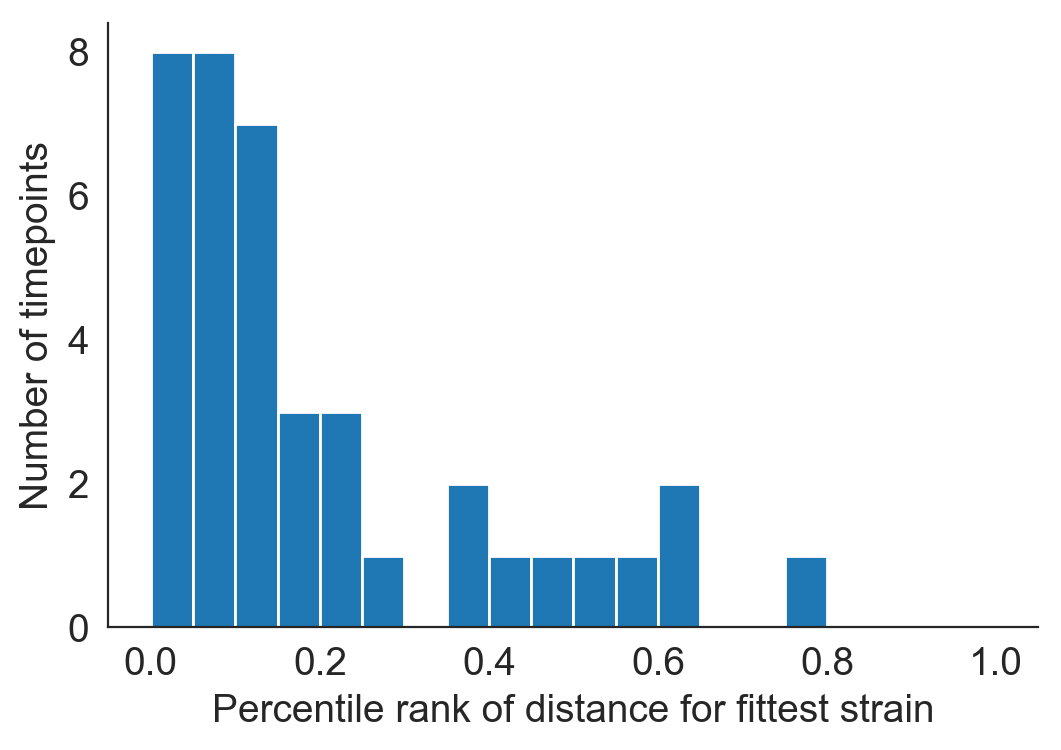

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(best_fitness_rank_by_timepoint_df["timepoint_rank"], bins=np.arange(0, 1.01, 0.05))
ax.set_xlabel("Percentile rank of distance for fittest strain")
ax.set_ylabel("Number of timepoints")

In [92]:
timepoints_in_lowest_20_pct = (best_fitness_rank_by_timepoint_df["timepoint_rank"] < 0.2).sum()
timepoints_in_lowest_20_pct

26

In [93]:
total_timepoints = best_fitness_rank_by_timepoint_df.shape[0]
total_timepoints

39

In [94]:
timepoints_in_lowest_20_pct / float(total_timepoints)

0.6666666666666666

In [73]:
distance_df = mean_distance_to_future_df.merge(
    minimum_distance_to_future_df,
    on="timepoint",
    suffixes=["_mean", "_observed"]
).merge(
    estimated_distance_to_future_df,
    on="timepoint"
)
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future
0,1995-10-01,17.001804,6.311513,11.704883
1,1996-04-01,11.614254,6.750710,6.750710
2,1996-10-01,13.582028,8.973677,12.949729
3,1997-04-01,11.810146,6.382600,14.222939
4,1997-10-01,13.604810,5.828201,14.974391


In [74]:
distance_df["distance_predicted"] = distance_df["weighted_distance_to_future"] / distance_df["weighted_distance_to_future_mean"]
distance_df["distance_minimum"] = distance_df["weighted_distance_to_future_observed"] / distance_df["weighted_distance_to_future_mean"]
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future,distance_predicted,distance_minimum
0,1995-10-01,17.001804,6.311513,11.704883,0.688449,0.371226
1,1996-04-01,11.614254,6.750710,6.750710,0.581244,0.581244
2,1996-10-01,13.582028,8.973677,12.949729,0.953446,0.660702
3,1997-04-01,11.810146,6.382600,14.222939,1.204298,0.540434
4,1997-10-01,13.604810,5.828201,14.974391,1.100669,0.428393


Text(0,0.5,'$\\Delta$(prediction)')

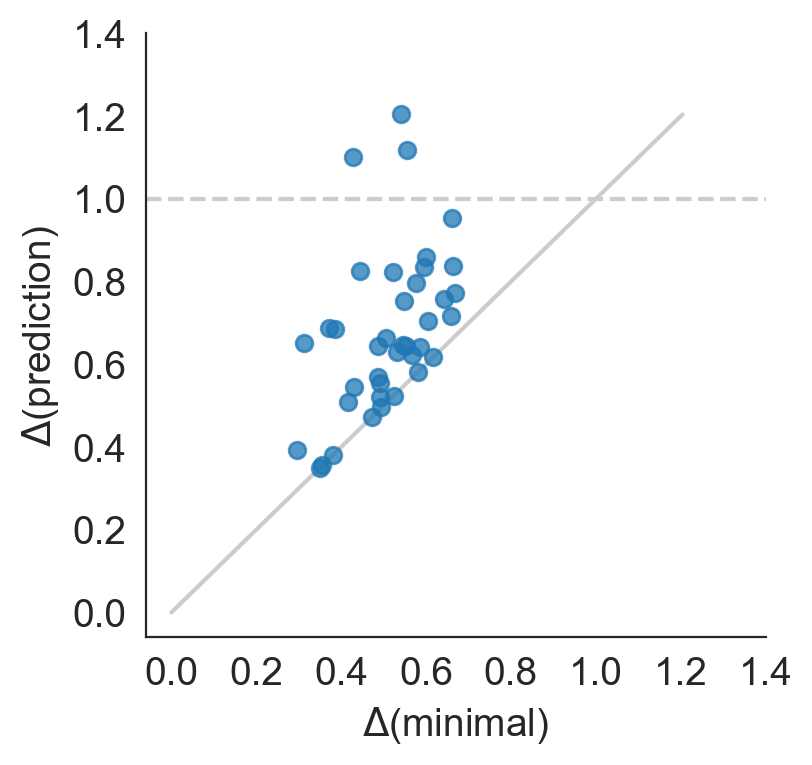

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

max_distance = max(distance_df["distance_predicted"].max(), distance_df["distance_minimum"].max())
line = np.linspace(
    0,
    max_distance,
    10
)

ax.plot(
    distance_df["distance_minimum"],
    distance_df["distance_predicted"],
    "o",
    alpha=0.75
)

ax.plot(line, line, color="#cccccc", zorder=-10)
ax.axhline(y=1, color="#cccccc", linestyle="--", zorder=-10)

ticks = np.arange(0, max_distance + 0.2, 0.2)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlabel("$\Delta$(minimal)")
ax.set_ylabel("$\Delta$(prediction)")